In [151]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score


In [152]:
data=pd.read_csv('/content/Admission_Predict.csv')
#print(data.head)
print(data.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


Exploratory Data Analysis

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [154]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [155]:
print(data.isnull().sum())
print(data.duplicated().sum)
print(data.nunique())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool>
Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64


Finding the correlation among features to selection

In [156]:
data_numeric=data.select_dtypes(include=[np.number])
correlation=data_numeric.corr()
print(correlation['Chance of Admit '].sort_values(ascending=False))
#

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Serial No.           0.042336
Name: Chance of Admit , dtype: float64


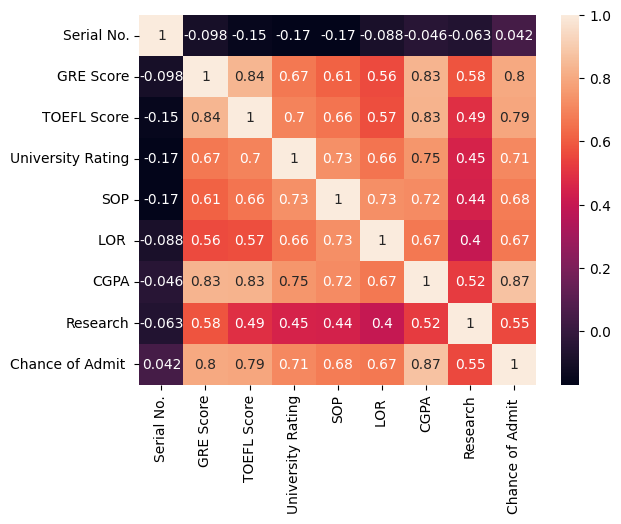

In [157]:
#creating heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation,annot=True)
plt.show()

Chance of Admit      1.000000
CGPA                 0.843793
GRE Score            0.764011
TOEFL Score          0.728192
University Rating    0.601593
SOP                  0.597746
LOR                  0.578857
Research             0.535830
Serial No.           0.148408
Name: Chance of Admit , dtype: float64


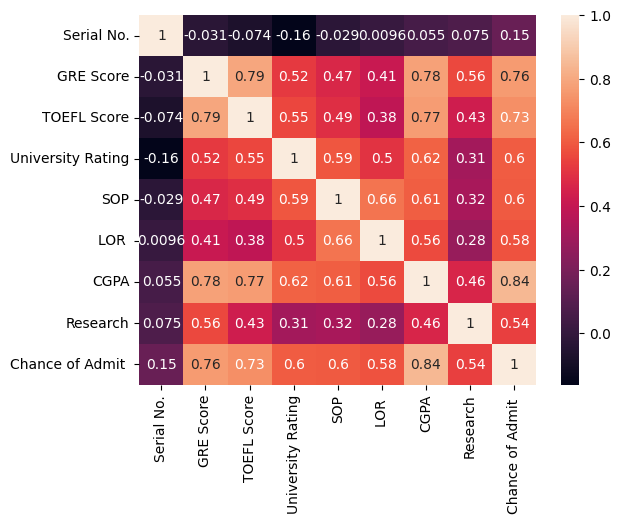

In [158]:
#finding how relationship changes for top universities with rating greater than or equal to 3
top_universities=data[data['University Rating']>=3]
correlation_top=top_universities.corr()
print(correlation_top['Chance of Admit '].sort_values(ascending=False))
sns.heatmap(correlation_top,annot=True)
plt.show()


In [159]:
#fitting the logistic regression
X = data.select_dtypes(include=[np.number])
print(X.columns)
X = X.drop(['Chance of Admit '], axis=1)
y = (data['Chance of Admit '] >= 0.5).astype(int)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
#Y=scaler.fit_transform(y.values.reshape(-1,1))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Results of Binary Classification without stratified")
from sklearn.metrics import accuracy_score, classification_report
accuracy=lr.score(X_test,y_test)
print(accuracy)
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')
Results of Binary Classification without stratified
0.9375
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.93      1.00      0.97        70

    accuracy                           0.94        80
   macro avg       0.97      0.75      0.82        80
weighted avg       0.94      0.94      0.93        80

[[ 5  5]
 [ 0 70]]


In [160]:
#fitting the logistic regression
X=data.drop('Chance of Admit ',axis=1)
y = (data['Chance of Admit '] >= 0.5).astype(int)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
#Y=scaler.fit_transform(y.values.reshape(-1,1))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


In [161]:
from sklearn.metrics import accuracy_score, classification_report
accuracy=lr.score(X_test,y_test)
print("Results of Binary Classification with stratified")
print(accuracy)
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


Results of Binary Classification with stratified
0.925
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.95      0.97      0.96        73

    accuracy                           0.93        80
   macro avg       0.77      0.70      0.73        80
weighted avg       0.92      0.93      0.92        80

[[ 3  4]
 [ 2 71]]


In [162]:
print(y.value_counts())


Chance of Admit 
1    367
0     33
Name: count, dtype: int64


In [163]:
def admission_category(prob):
    if prob >= 0.85:
        return 'Highly Likely'
    elif prob >= 0.7:
        return 'Likely'
    elif prob >= 0.5:
        return 'Uncertain'
    else:
        return 'Unlikely'

data['Admit_Level'] = data['Chance of Admit '].apply(admission_category)
print(data['Admit_Level'].value_counts())

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Admit_Level_Encoded'] = le.fit_transform(data['Admit_Level'])

from sklearn.model_selection import train_test_split

X = data.drop(['Chance of Admit ', 'Admit_Level', 'Admit_Level_Encoded'], axis=1)
y = data['Admit_Level_Encoded']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

StandardScaler = StandardScaler()
X_train_m = StandardScaler.fit_transform(X_train_m)
X_test_m = StandardScaler.transform(X_test_m)
print("Results Of Multi-Class Regression with stratified")
lr_new=LogisticRegression()
lr_new.fit(X_train_m,y_train_m)
y_pred_new=lr_new.predict(X_test_m)
accuracy_new=lr_new.score(X_test_m,y_test_m)
print(accuracy_new)
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_m, y_pred_new) )
print(classification_report(y_test, y_pred))


Admit_Level
Likely           158
Uncertain        120
Highly Likely     89
Unlikely          33
Name: count, dtype: int64
Results Of Multi-Class Regression with stratified
0.7375
[[16  2  0  0]
 [ 1 23  7  0]
 [ 0  5 19  0]
 [ 0  0  6  1]]
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.95      0.97      0.96        73

    accuracy                           0.93        80
   macro avg       0.77      0.70      0.73        80
weighted avg       0.92      0.93      0.92        80



In [164]:
def admission_category(prob):
    if prob >= 0.85:
        return 'Highly Likely'
    elif prob >= 0.7:
        return 'Likely'
    elif prob >= 0.5:
        return 'Uncertain'
    else:
        return 'Unlikely'

data['Admit_Level'] = data['Chance of Admit '].apply(admission_category)
print(data['Admit_Level'].value_counts())

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Admit_Level_Encoded'] = le.fit_transform(data['Admit_Level'])

from sklearn.model_selection import train_test_split

X = data.drop(['Chance of Admit ', 'Admit_Level', 'Admit_Level_Encoded'], axis=1)
y = data['Admit_Level_Encoded']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y, test_size=0.2, random_state=42)


del StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler


standard = StandardScaler()
X_train_m = standard.fit_transform(X_train_m)
X_test_m = standard.transform(X_test_m)
print("Results Of Multi-Class Regression without stratified")

lr_new=LogisticRegression()
lr_new.fit(X_train_m,y_train_m)
y_pred_new=lr_new.predict(X_test_m)
accuracy_new=lr_new.score(X_test_m,y_test_m)
print(accuracy_new)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_m, y_pred_new))

print(classification_report(y_test_m, y_pred_new))

Admit_Level
Likely           158
Uncertain        120
Highly Likely     89
Unlikely          33
Name: count, dtype: int64
Results Of Multi-Class Regression without stratified
0.8125
[[21  1  0  0]
 [ 2 21  3  0]
 [ 0  3 18  1]
 [ 0  1  4  5]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.81      0.81      0.81        26
           2       0.72      0.82      0.77        22
           3       0.83      0.50      0.62        10

    accuracy                           0.81        80
   macro avg       0.82      0.77      0.78        80
weighted avg       0.82      0.81      0.81        80

